In [90]:
from textblob import TextBlob
import sys,tweepy
import matplotlib.pyplot as plt

In [91]:
def percentage(part,whole):
    return 100*float(part)/float(whole)

In [92]:
consumeKey="pDUy3QmylkFXbI6ohhbKCE6hH"
consumerSecret="uw8vDnbi9cjHwJYzatjCTx8ZLO3dKKqj0OxyzNDVNnnVWWw4n9"
accessToken="853232902259298306-jIb8GytBuk3rxp4acLv6A8S1pc3rXJX"
accessTokenSecret="EtvFTyclHnRWTHWdpsakY4V7PInWSrG6bR0T0BEcQTAXP"

auth=tweepy.OAuthHandler(consumeKey,consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(auth)

searchTerm=input("Enter Keyword/hastag to search")
noOfSearchTerms=int(input("Enter how many tweets to analyse"))

tweets=tweepy.Cursor(api.search,q=searchTerm,lang="English").items(noOfSearchTerms)
positive = 0
negative=0
neutral=0
polarity=0

for tweet in tweets:
    #print(tweet.text)
    analysis=TextBlob(tweet.text)
    polarity+=analysis.sentiment.polarity
    
    if(analysis.sentiment.polarity==0):
        neutral+=1
    if(analysis.sentiment.polarity<0):
        negative+=1    
    if(analysis.sentiment.polarity>0):
        positive+=1
        
positive=percentage(positive,noOfSearchTerms)
negative=percentage(negative,noOfSearchTerms)
neutral=percentage(neutral,noOfSearchTerms)

positive=format(positive,'.2f')
neutral=format(neutral,'.2f')
negative=format(negative,'.2f')


Enter Keyword/hastag to searchindia
Enter how many tweets to analyse5


In [93]:
print('How people are reacting on ' +searchTerm+'by analyzing '+str(noOfSearchTerms)+'Tweets.')
if(polarity==0):
    print("neutral")
elif(polarity<0):
    print("negative")
elif(polarity>0):
    print("positive")

How people are reacting on indiaby analyzing 5Tweets.
positive


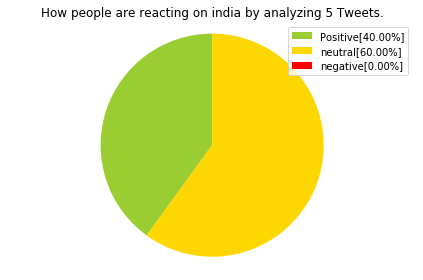

In [94]:
labels=['Positive['+str(positive)+'%]','neutral['+str(neutral)+'%]','negative['+str(negative)+'%]']
sizes=[positive,neutral,negative]
colors=['yellowgreen','gold','red']
patches,texts=plt.pie(sizes,colors=colors,startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()


In [95]:
a=TextBlob("I am the best programmer ever")

In [96]:
a.sentiment.polarity

1.0